## Проект: Procrastinate Pro+

<a id="num2"></a>
## Цели

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

<a id="num3"></a>
## Поставленные вопросы

1. Окупается ли реклама, направленная на привлечение пользователей в целом?
2. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
3. Чем могут быть вызваны проблемы окупаемости?
4. Какие могут быть сформированы рекомендации для отдела маркетинга по итогам анализа. 

<a id="num4"></a>
## Оглавление 
* [2. Цели исследования](#num2)
* [3. Поставленные вопросы](#num3)
* [4. Оглавление](#num4)
* [5. Ключ к данным](#num5)
* [6. Подготовка данных](#num6)
    * [6.1. Библиотеки](#num61)
    * [6.2. Загрузка данных](#num62)
    * [6.3. Функции](#num63)
    * [6.4. Ознакомление с данными](#num64)
    * [6.5. Предобработка данных](#num65)
        * [6.5.1 Типы данных](#num651)
        * [6.5.2 Таблица data_visits_info](#num652)
        * [6.5.3 Таблица data_orders_info](#num653)
        * [6.5.4 Таблица data_costs_info](#num654)
        * [6.5.5 Дубликаты в данных](#num655)
* [7. Исследование](#num7)
    * [7.1 Профили пользователей](#num71)
    * [7.2 Профили пользователей: по странам](#num72)
    * [7.3 Профили пользователей: по устройствам](#num73)
    * [7.4 Профили пользователей: по каналам привлечения](#num74)
    * [7.5 Профили пользователей: выводы](#num75)
* [8. Маркетинг](#num8) 
    * [8.1 Маркетинг: общие расходы](#num81) 
    * [8.2 Маркетинг: распределение средств по источникам](#num82) 
    * [8.3 Маркетинг: динамика расходов во времени](#num83) 
    * [8.4 Маркетинг: стоимость привлечения](#num84) 
    * [8.5 Маркетинг: выводы](#num85)
* [9. Окупаемость рекламы](#num9) 
    * [9.1 Окупаемость рекламы: графики LTV и ROI](#num91)
    * [9.2 Окупаемость рекламы: конверсия пользователей и динамика](#num92)
    * [9.3 Окупаемость рекламы: по устройствам](#num93)
    * [9.4 Окупаемость рекламы: по странам](#num94)
    * [9.5 Окупаемость рекламы: по каналам привлечения](#num95)
    * [9.6 Конверсия: по устройствам](#num96)
    * [9.7 Конверсия: по странам](#num97)
    * [9.8 Конверсия: по каналам привлечения](#num98)
    * [9.9 Окупаемость рекламы: итог](#num99)
* [10. Выводы](#num10)
* [11. Рекомендации](#num11)


<a id="num5"></a>
## Ключ к данным 

### Таблица ``data_visits_info``

Содержит данные о посещении сайтов с 

Данные из файла ``visits_info_short.csv``.

<div style="background-color: #f2f2f2; color: #000; font-size: 14px; padding: 10px; margin: 10px; border: solid 1px #ccc; width: 98%; height: 98%">

  
| Название столбца в датафрейме | Оригинальное название  | Описание |
|-------------------------------|------------------------|----------|
| user_id                       | User Id                | Уникальный идентификатор пользователя |
| region                        | Region                 | Страна пользователя |
| device 	                    | Device                 | Тип устройства пользователя |
| channel                       | Channel                | Идентификатор источника перехода |
| session_start                 | Session Start          | Дата и время начала сессии |
| session_end                   | Session End            | Дата и время окончания сессии |

</div>


Названия не были замещены другими, но написание названий было приведено к единому стилю. 

### Таблица ``data_orders_info``

Информация о заказах.

Данные из файла ``orders_info_short.csv``.

<div style="background-color: #f2f2f2; color: #000; font-size: 14px; padding: 10px; margin: 10px; border: solid 1px #ccc; width: 98%; height: 98%">

  
| Название столбца в датафрейме | Оригинальное название  | Описание |
|-------------------------------|------------------------|----------|
| user_id                       | User Id                | Уникальный идентификатор пользователя |
| event_dt                      | Event Dt               | Дата и время покупки |
| revenue  	                    | Revenue                | Сумма заказа |

</div>

Названия не были замещены другими, но написание названий было приведено к единому стилю. 

### Таблица ``data_costs_info``

Информация о расходах на рекламу.

Данные из файла ``costs_info_short.csv``.

<div style="background-color: #f2f2f2; color: #000; font-size: 14px; padding: 10px; margin: 10px; border: solid 1px #ccc; width: 98%; height: 98%">

  
| Название столбца в датафрейме | Оригинальное название  | Описание |
|-------------------------------|------------------------|----------|
| dt                            | dt                     | Дата проведения рекламной кампании |
| channel                       | Channel                | Идентификатор рекламного источника |
| costs   	                    | costs                  |Расходы на эту кампанию |

</div>

Названия не были замещены другими, но написание названий было приведено к единому стилю. 

<a id="num6"></a>
## Подготовка данных

<a id="num61"></a>
### Библиотеки

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os

<a id="num62"></a>
### Загрузка данных

In [2]:
try:
    data_visits_info = pd.read_csv('/datasets/visits_info_short.csv') 
    data_orders_info = pd.read_csv('/datasets/orders_info_short.csv') 
    data_costs_info = pd.read_csv('/datasets/costs_info_short.csv') 
except:
    data_visits_info = pd.read_csv('visits_info_short.csv') 
    data_orders_info = pd.read_csv('orders_info_short.csv') 
    data_costs_info = pd.read_csv('costs_info_short.csv') 

<a id="num63"></a>
### Функции

#### Функция data_head_desc_info()

Функция ``data_head_desc_info`` отображает основную информацию о имеющихся данных из указанного файла. 

*data_head_desc_info(датафрейм)*.

In [3]:
def data_head_desc_info(data):
    try:
        display('Первые пять строк данных:')
        display(data.head(5))
        display('Описание данных:')
        display(data.describe())
        display('Общая информацию о датафрейме')
        display(data.info())
        display('Графическое отображение количества пропусков')
        display(pd.DataFrame(round(data.isna().mean()*100,1).sort_values()).style.background_gradient('Blues'))
    except:
        return 'Проверьте параметры'

#### Функция get_profiles()

Функция ``get_profiles`` — создание профилей пользователей. 

*get_profiles(датафрейм с информацией о посещении, датафрейм с информацией о заказах, датафрейм с информацией о затратах на рекламу)*.

In [4]:
def get_profiles(visits, orders, ad_costs):
    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    ad_costs['dt'] = ad_costs['dt'].dt.date
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция get_retention()

 Функция ``get_retention`` — для подсчёта удержания клиентов. 
 
*get_retention(профили пользователей, информация о посещении, дата момента анализа, горизонт анализа в днях, измерение, выполнение с горизонтом анализа или без)*

In [5]:
def get_retention(
    profiles,
    visits_info_short,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits_info_short[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

####  Функция get_conversion() 

Функция ``get_conversion`` для подсчета конверсии. 

*get_conversion(профили пользователей, информация о посещении, дата момента анализа, горизонт анализа в днях, измерение, выполнение с горизонтом анализа или без)*

In [6]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

####  Функция get_ltv()

Функция ``get_ltv`` для подсчета «пожизненной» ценности клиента и окупаемости. 

*get_ltv(профили пользователей, информация о покупках, дата момента анализа, горизонт анализа в днях, измерение, выполнение с горизонтом анализа или без)*

In [7]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функция filter_data()

Функция ``filter_data`` — для сглаживания датафрейма. 

*filter_data(датафрейм, размер окна сглаживания)*

In [8]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция plot_retention()

Функция ``plot_retention`` — визуализация удержания клиентов. 

*plot_retention(таблица удержания, таблица динамики удержания, день жизни, по которому хотим изучить динамику удержания, ширина окна сглаживания)*

In [9]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Функция plot_conversion()

Функция ``plot_conversion`` — построения графика конверсии.

*plot_conversion(таблица конверсии, таблица истории конверсии, день жизни, по которому хотим изучить динамику удержания, ширина окна сглаживания)*

In [10]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция plot_ltv_roi()

Функция ``plot_ltv_roi`` — для визуализации LTV и ROI.

*plot_ltv_roi(таблица «пожизненной» ценности клиента, таблица истории «пожизненной» ценности клиента, таблица окупаемости, таблица истории окупаемости, день жизни, по которому хотим изучить динамику удержания, ширина окна сглаживания)*

In [11]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<a id="num_payers"></a>
#### Функция payer_counts_by()

Функция ``payer_counts_by`` — отображение сводной информации по профилям пользователей. 

*payer_counts_by(измерение)*.

In [12]:
def payer_counts_by(index):

    df = profiles.groupby(index).agg({
    'user_id': 'nunique',           
    'payer': 'sum',                 
    'acquisition_cost': 'mean'    
    }).reset_index()

    df['Доля платящих'] = (df['payer'] / df['user_id'] * 100).round(1)
    
    df = df.rename(columns={
        'user_id': 'Всего пользователей',
        'payer': 'Всего платящих от всех пользователей',
        'acquisition_cost': 'Средние затраты на привлечение'
    })
    
    display(df.sort_values(by='Доля платящих', ascending=False)
            .style
            .background_gradient(subset=['Доля платящих'], cmap='Blues') 
            .format({'Доля платящих': '{:.1f}%'.format, 'Средние затраты на привлечение': '{:.2f}'.format}))
    
             values='Всего платящих от всех пользователей', 
             names=index,
             color_discrete_sequence=colors,
             title='Всего платящих от всех пользователей', 
             height=500)

    fig.update_traces(textposition='inside', textinfo='percent', hovertemplate='')
    fig.update_layout(showlegend=True, legend_title=index,
                     margin={"r": 0, "t": 50, "l": 0, "b": 50},)
    fig.show()   
    return

#### Цветовая палитра colors

Цветовая палитра ``colors`` для визуализации данных.

In [13]:
colors = (['#063751','#08527A','#0B6DA2','#0E89CB','#15A3EF','#3EB3F2','#66C3F4','#8FD3F7','#B7E3FA','#B7E3FA','#8FD3F7','#66C3F4','#3EB3F2','#15A3EF','#0E89CB','#0B6DA2','#08527A','#063751'])

<a id="num64"></a>
### Ознакомление с данными

Получим краткую информацию о датафрейме ``data_visits_info``.

In [14]:
data_head_desc_info(data_visits_info)

'Первые пять строк данных:'

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

'Описание данных:'

User Id
count  3.099010e+05
mean   4.997664e+11
std    2.887899e+11
min    5.993260e+05
25%    2.493691e+11
50%    4.989906e+11
75%    7.495211e+11
max    9.999996e+11

'Общая информацию о датафрейме'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

'Графическое отображение количества пропусков'

В таблице ``data_visits_info`` представлен лог сервера с информацией о посещениях сайте. 

Количество записей в данных — ``309901``. Пропусков в данных нет. 

Столбцы с данными ``Session Start`` и ``Session End`` имеют тип ``object``, в дальнейшем сменим на тип данных для представления значений как даты.

Получим краткую информацию о датафрейме ``data_orders_info``.

In [15]:
data_head_desc_info(data_orders_info)

'Первые пять строк данных:'

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

'Описание данных:'

User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000

'Общая информацию о датафрейме'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

'Графическое отображение количества пропусков'

В таблице ``data_orders_info`` представлена информация о заказах. 

Количество записей в данных — ``40212``. Пропусков в данных нет. 

Столбец с данными ``Event Dt`` имеет тип ``object``, в дальнейшем сменим на тип данных для представления значений как даты.

Получим краткую информацию о датафрейме ``data_costs_info``.

In [16]:
data_head_desc_info(data_costs_info)

'Первые пять строк данных:'

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

'Описание данных:'

costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000

'Общая информацию о датафрейме'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

'Графическое отображение количества пропусков'

В таблице ``data_costs_info`` представлена информация о расходах на рекламу.

Количество записей в данных — ``1800``. Пропусков в данных нет. 

Столбец с данными ``dt`` имеет тип ``object``, в дальнейшем сменим на тип данных для представления значений как даты.

 
В полученных данных нет глобальных проблем, пропусков и прочих проблем, которые могли бы помешать работе. 

Прежде чем преступим к дальнейшему анализу сменим тип данных в столбцах, которые определили выше: 
- в ``data_visits_info`` — ``Session Start`` и ``Session End``;
- в ``data_orders_info`` — ``Event Dt``;
- в ``data_costs_info`` — ``dt``. 

Также приведем названия столбцов к единому виду. 

<a id="num65"></a>
### Предобработка данных

<a id="num651"></a>
#### Типы данных

Сменим типы данных в столбцах с __object__ на __datetime__.

В ``data_visits_info`` — ``Session Start``, ``Session End``.

В ``data_orders_info`` — ``Event Dt``. 
 
В ``data_costs_info`` — ``dt``. 

In [17]:
data_visits_info['Session Start'] = pd.to_datetime(data_visits_info['Session Start'])
data_visits_info['Session End'] = pd.to_datetime(data_visits_info['Session End'])

In [18]:
data_orders_info['Event Dt'] = pd.to_datetime(data_orders_info['Event Dt'])

In [19]:
data_costs_info['dt'] = pd.to_datetime(data_costs_info['dt'])

<a id="num652"></a>
#### Таблица data_visits_info

Приведем названия столбцов к единому виду и сменим тип данных.

In [20]:
data_visits_info.columns = [x.lower().replace(' ', '_') for x in data_visits_info.columns.values]

<a id="num653"></a>
#### Таблица data_orders_info

Приведем названия столбцов к единому виду и сменим тип данных.

In [21]:
data_orders_info.columns = [x.lower().replace(' ', '_') for x in data_orders_info.columns.values]

<a id="num654"></a>
#### Таблица data_costs_info


Приведем названия столбцов к единому виду и сменим тип данных.

In [22]:
data_costs_info.columns = [x.lower().replace(' ', '_') for x in data_costs_info.columns.values]

<a id="num655"></a>
#### Дубликаты

Проверим дублирующиеся данные. 

In [23]:
data_visits_info['user_id'].duplicated().value_counts()

True     159893
False    150008
Name: user_id, dtype: int64

Всего в ``data_visits_info`` ``150008`` уникальных значений. Так как это значения по идентификатору пользователя, то повторения не критичны. 

In [24]:
data_orders_info['user_id'].duplicated().value_counts()

True     31331
False     8881
Name: user_id, dtype: int64

Всего в ``data_orders_info`` ``8881`` уникальное значение. Так как это значения по идентификатору пользователя, то повторения не критичны. 

Исключим наличие дублирования данных, которое могло произойти в одно время начала или конца сессии. 

В таблице: ``data_visits_info``.

In [25]:
display(data_visits_info[data_visits_info.duplicated(subset=['user_id', 'session_start'], keep=False)])
display(data_visits_info[data_visits_info.duplicated(subset=['user_id', 'session_end'], keep=False)])

Empty DataFrame
Columns: [user_id, region, device, channel, session_start, session_end]
Index: []

Empty DataFrame
Columns: [user_id, region, device, channel, session_start, session_end]
Index: []

В таблице: ``data_orders_info``.

In [26]:
data_orders_info[data_orders_info.duplicated(subset=['user_id', 'event_dt'], keep=False)]

Empty DataFrame
Columns: [user_id, event_dt, revenue]
Index: []

В таблице ``data_costs_info`` проверим дублирование данных по запускаемым рекламным компаниям. 

In [27]:
data_costs_info[data_costs_info.duplicated(subset=['dt', 'channel', 'costs'], keep=False)]

Empty DataFrame
Columns: [dt, channel, costs]
Index: []

Дублирования данных в таблицах нет. 

<a id="num656"></a>
#### Предобработка данных: выводы

Данные представлены в хорошем состоянии, нет пропусков, нет дублирований. 

Были изменены типы данных в столбцах с датами: 
- В таблице ``data_visits_info`` изменения коснулись столбцов ``Session Start``, ``Session End``;
- В таблице ``data_orders_info`` — ``Event Dt``;
- В таблице ``data_costs_info`` — ``dt``. 

Были изменены написания названий столбцов. 

В таблице ``data_visits_info``: 
- ``User Id``  — ``user_id``;
- ``Region`` — ``region``;
- ``Device`` — ``device``;
- ``Channel`` — ``channel``;
- ``Session Start`` — ``session_start``;
- ``Session End`` — ``session_end``.

В таблице ``data_orders_info``: 
- ``User Id``  — ``user_id``;
- ``Event Dt`` — ``event_dt``;
- ``Revenue`` — ``revenue``.

В таблице ``data_costs_info``: 
- ``Channel`` — ``channel``.

<a id="num7"></a>
## Исследование

Прежде всего составим профили пользователей и ознакомимся с ключевыми моментами, такими как, из каких стран заходили в приложение, какими устройствами пользовались посетители, а также какие каналы привлечения способствовали переходу на сайт. 

<a id="num71"></a>
### Профили пользователей

Получим профили пользователей.

In [28]:
profiles = get_profiles(data_visits_info, data_orders_info, data_costs_info)
profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Минимальная дата привлечения пользователей. 

In [29]:
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

Максимальная дата привлечения пользователей.

In [30]:
profiles['first_ts'].max()

Timestamp('2019-10-27 23:59:04')

<a id="num72"></a>
### Профили пользователей: по странам

Определим страны из которых было посещение платящих пользователей, а также долю каждой страны из общего количества платящих. 

In [31]:
payer_counts_by('region')

<a id="num73"></a>
### Профили пользователей: по устройствам

Определим устройства которыми пользовались платящие пользователи, а также долю каждого приложения из общего количества платящих. 

In [32]:
payer_counts_by('device')

<a id="num74"></a>
### Профили пользователей: по каналам привлечения

Определим каналы привлечения из которых были привлечены платящие пользователи, а также их долю из общего количества платящих. 

In [33]:
payer_counts_by('channel')

<a id="num75"></a>
### Профили пользователей: выводы

По полученным данным можно сделать следующие выводы: 
- ``США`` занимают первое место __по доле платящих__ пользователей среди всех привлеченных. ``6.9%`` пользователей из ``США`` совершают покупки. Однако доля __платящих__ пользователей из ``США`` составляет ``77.7%`` 
__от общего числа платящих__ пользователей.

- В ``Германии``, ``Великобритании`` и ``Франции`` __доля платящих__ пользователей составляет примерно ``4%`` от всех привлеченных.

- Среди пользователей с ``Mac`` наибольшая __доля платящих__ — ``6.4%``, что делает их лидерами среди платящих пользователей. С другой стороны, среди пользователей ``PC`` доля платящих составляет __всего__ ``5%``.

- Самая большая доля платящих пользователей была привлечена через ``FaceBoom`` — ``12.2%`` платящих, и стоимость привлечения одного пользователя составила ``1.11``. Пользователи с ``TipTop`` обходятся дороже — ``2.8`` на пользователя, доля платящих среди них составляет __всего__ ``9.6%``.

- Несмотря на то, что ``40.3%`` пользователей __не были привлечены рекламой__, лишь ``2.1%`` из них становятся __платящими__. 

Общим образом, анализ показывает, что ``США`` имеют наибольшую долю платящих пользователей, что пользователи с ``Mac`` более склонны к покупкам. 

<a id="num8"></a>
## Маркетинг

<a id="num81"></a>
### Маркетинг: общие расходы

Посчитаем сколько всего средств было затрачено на рекламу и привлечение. 

In [34]:
display(pd.DataFrame({'Общая сумма расходов на маркетинг:': [data_costs_info['costs'].sum().round(2)]}))

Общая сумма расходов на маркетинг:
0                            105497.3

__Общая сумма__ расходов на маркетинг составила ``105497.3`` денежные единицы. 

<a id="num82"></a>
### Маркетинг: распределение средств по источникам

Определим сколько средств было потрачено на каждый канал привлечения. 

In [35]:
data_costs_info_pivot = data_costs_info.pivot_table(index='channel', values='costs', aggfunc='sum').sort_values(by='costs', ascending=False)
data_costs_info_pivot['percent_payers'] = ((data_costs_info_pivot['costs'] / data_costs_info_pivot['costs'].sum()) * 100).round(1)
data_costs_info_pivot = data_costs_info_pivot.rename(columns={'costs': 'Всего', 
                        'percent_payers': 'Процент от всех'})
display(data_costs_info_pivot.sort_values(by='Процент от всех', ascending=False)
            .style
            .background_gradient(subset=['Процент от всех'], cmap='Blues') 
            .format({'Всего': '{:.2f}'.format, 'Процент от всех': '{:.1f}'.format}))


Больше всего средств было потрачено на ``TipTop`` — ``51.9%`` от всей суммы и на ``FaceBoom`` — ``30.8%``. На ``остальные источники`` потратили суммарно ``17.3%`` от всех средств. 

<a id="num83"></a>
### Маркетинг: динамика расходов во времени

Построим графики расхода средств на продвижение в разрезе времени.

In [36]:
data_costs_info_monthweek = data_costs_info.copy()

data_costs_info_monthweek['dt'] = pd.to_datetime(data_costs_info_monthweek['dt'])
data_costs_info_monthweek['week'] = data_costs_info_monthweek['dt'].astype('datetime64[W]')
data_costs_info_monthweek['month'] = data_costs_info_monthweek['dt'].astype('datetime64[M]')

weekly_spending = data_costs_info_monthweek.groupby(['channel', 'week'])['costs'].sum().reset_index()
monthly_spending = data_costs_info_monthweek.groupby(['channel', 'month'])['costs'].sum().reset_index()

Расходы на рекламу поделены по неделям, от недели, которая началась 25 апреля — это 18-я неделя года, и до недели от 24 октября — это 43-я неделя, что включает весь представленный период с 01.05.2019 по 27.10.2019.

In [37]:
#недели
fig_weekly = px.area(weekly_spending, 
                     x='week', 
                     y='costs', 
                     color='channel',
                     labels={'channel': 'Канал', 'week': 'Неделя', 'costs': 'Расходы'},
                     title='Расходы на рекламу понедельно')
fig_weekly.update_layout(yaxis_title='Расходы',
                         xaxis_title='Неделя',
                         showlegend=True, 
                         legend_title='Каналы',
                         template='plotly_white')
fig_weekly.update_xaxes(showline=True,
                       linewidth=1,
                       linecolor='black',
                       mirror=True)
fig_weekly.update_yaxes(showline=True,
                        linewidth=1,
                        linecolor='black',
                        mirror=True)
fig_weekly.show()


Расходы на рекламу представлены помесячно с мая по октябрь 2019 года. 

In [38]:
#месяцы
fig_monthly = px.area(monthly_spending, 
                      x='month', 
                      y='costs', 
                      color='channel',
                      labels={'channel': 'Канал', 'month': 'Месяц', 'costs': 'Расходы'},
                      title='Расходы на рекламу помесячно')
fig_monthly.update_layout(yaxis_title='Расходы',
                          xaxis_title='Месяц',
                          showlegend=True, 
                          legend_title='Каналы',
                          template='plotly_white')
fig_monthly.update_xaxes(showline=True,
                       linewidth=1,
                       linecolor='black',
                       mirror=True)
fig_monthly.update_yaxes(showline=True,
                        linewidth=1,
                        linecolor='black',
                        mirror=True)
fig_monthly.show()


Средства на рекламу выделялись в основном на ``TipTop`` и ``FaceBoom``. 
Практически __каждую неделю бюджет__ на рекламу из этих двух источников __повышался__, за исключением нескольких периодов ``23-24`` неделя, ``28-30`` и ``41-43`` недели. Уменьшение бюджета одинаково понижалось для двух источников сразу, что вероятно обусловлено внутренним планом. 

Если смотреть по каждому месяцу отдельно, то также видно, что расходы на рекламу __возрастали каждый месяц__. Если в самом начале, ``в мае``, было потрачено для ``FaceBoom`` — ``2.9 тысячи``, то ``в сентябре`` эта сумма составляла уже ``более 13 тысяч`` в месяц. Тоже самое справедливо и для ``TipTop`` в мае потрачено — ``3.5 тысячи``, а к сентябрю эта сумма постепенно увеличилась до ``6.1 тысячи`` в месяц. 

По остальным рекламным источникам траты были крайне скромными, если сравнивать с лидерами, __минимальная сумма__ в неделю была ``15 единиц``, а __максимальная__ ``309``. Если смотреть помесячно, то __минимум__ было потрачено ``97.4``, а максимум ``1040`` денежных единиц. 

*Так как октябрь в данные включен не полностью, то в помесячном представлении не учитываю при интерпретации результатов*.

<a id="num84"></a>
### Маркетинг: стоимость привлечения

Посмотрим на стоимость привлечения одного пользователя в разрезе каждого из представленных рекламных источников. 

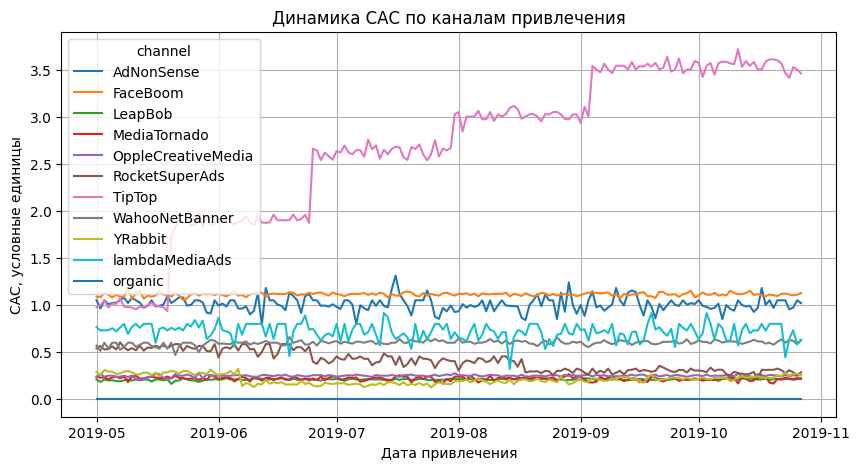

In [39]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
    ).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, условные единицы')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

__Больше всего__ на привлечение пользователя было потрачено через канал ``TipTop``, стоимость за одного клиента __выросла__ до более чем ``3.5`` условных единиц в максимуме, в то врем как из остальных источников пользователи обходились чуть более чем в ``1`` условную единицу. 

<a id="num85"></a>
### Маркетинг: выводы

__Большинство платящих__ пользователей ``77.7%`` приходят из ``США``, в то время как __остальные страны__ вносят лишь ``22.3%`` в общее количество платежей. Это указывает на __высокий потенциал американского рынка__, но также может свидетельствовать о проблемах с окупаемостью в данной стране.

__Платящие__ пользователи предпочитают использовать смартфоны ``iPhone`` — ``38.1%`` и компьютеры ``Mac`` — ``21.5%``, что может говорить о специфической аудитории, ориентированной на более дорогие и высококлассные устройства.

Основные __платящие__ пользователи были привлечены через каналы ``FaceBoom`` — ``40.1%`` и ``TipTop`` — ``21.1%``. __Остальные источники__ в сумме составили лишь ``25.9%``, а ``13.1%`` платящих пользователей вообще не были привлечены рекламой. Это подчеркивает важность эффективности выбранных каналов.

Основное __финансовое внимание__ уделялось каналам ``TipTop`` — ``51.9%`` и ``FaceBoom`` — ``30.8%``, что свидетельствует о значительных вложениях в эти источники. Постепенное увеличение бюджета на эти каналы, за исключением некоторых периодов, может свидетельствовать о постоянной стратегии увеличения рекламных вложений.

Канал ``TipTop`` доминирует по затратам на привлечение пользователя, однако стоимость привлечения через него значительно выше (__более__ ``3.5`` условных единиц в максимуме), чем через остальные источники (около 1 условной единицы).


<a id="num9"></a>
## Окупаемость рекламы

Для дальнейшего использования установим дату анализа на последний день периода. 

In [40]:
observation_date = datetime(2019, 11, 1).date()  
horizon_days = 14 

In [41]:
profiles_not_organic = profiles.query('channel != "organic"')

<a id="num91"></a>
### Окупаемость рекламы: LTV и ROI

Посмотрим с помощью графиков на то, как окупается реклама. Установим дату анализа на последний день периода. 

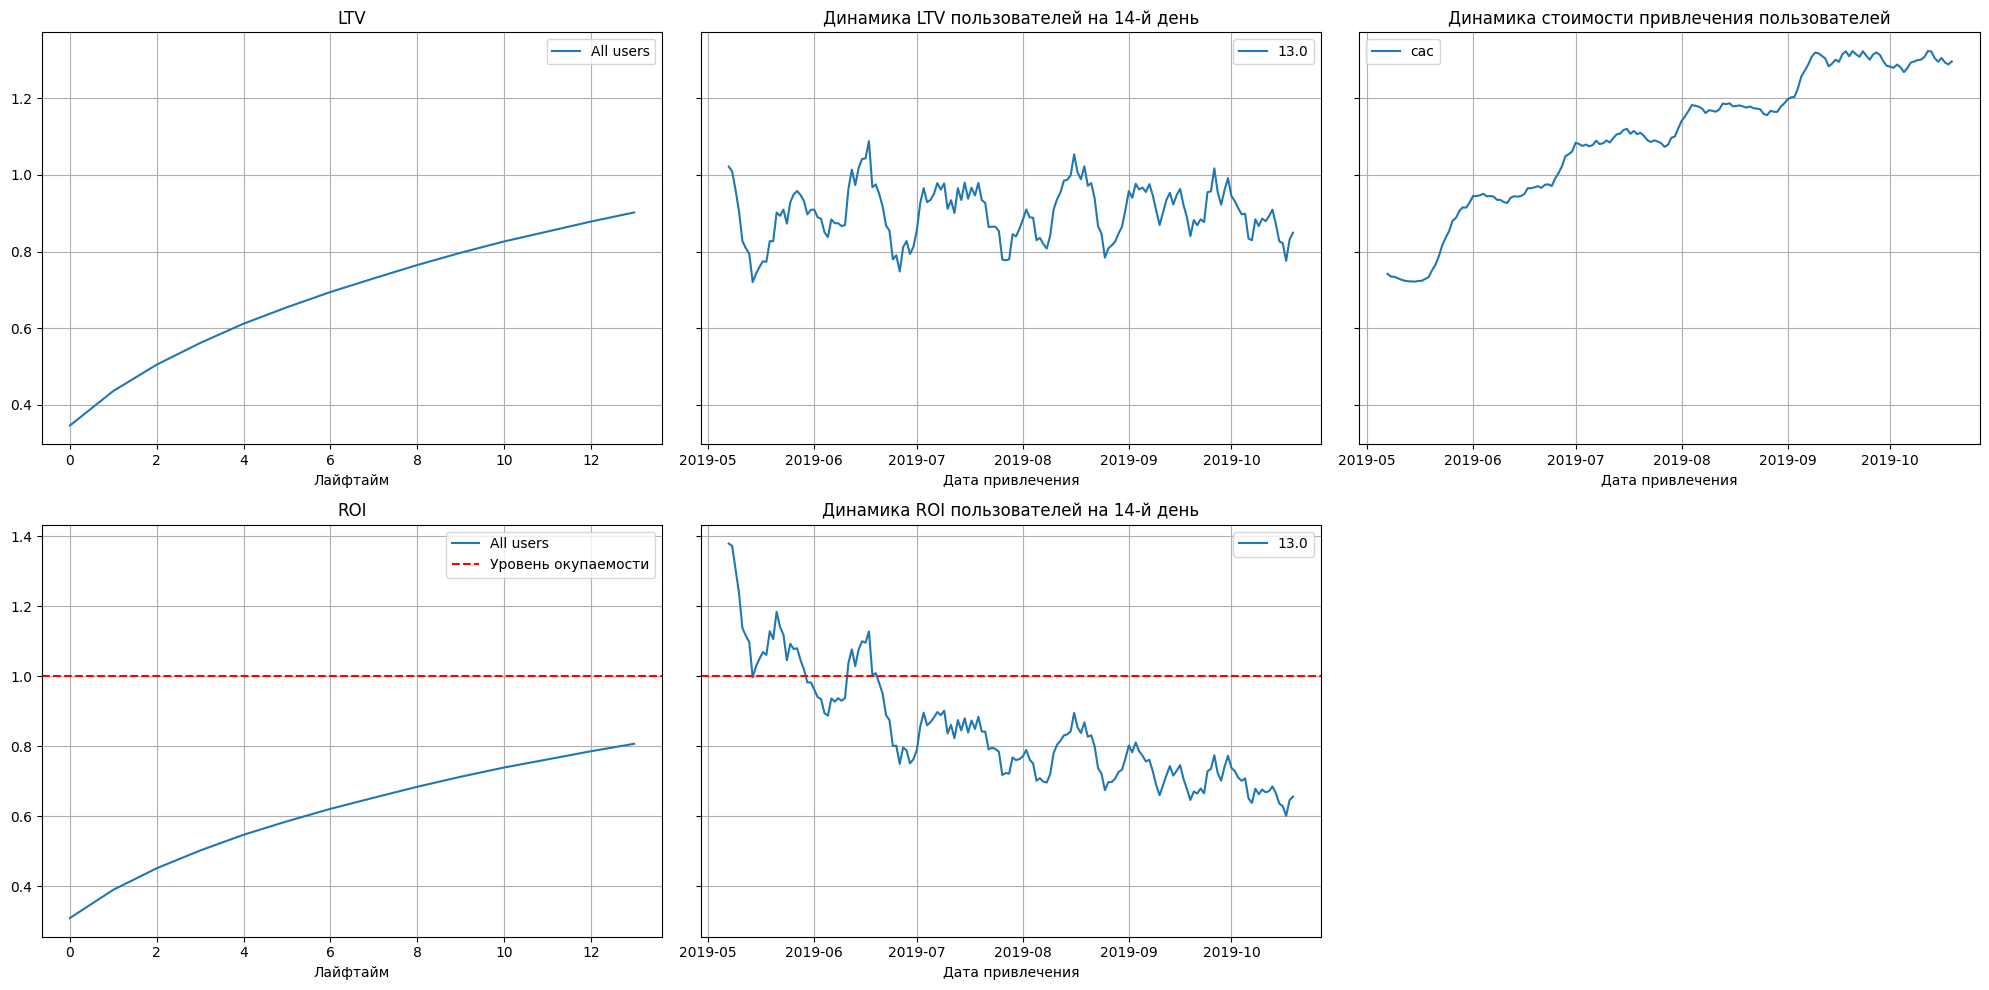

In [42]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, data_orders_info, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Затраченные средтва плохо окупаются. 

Стоимость привлечения пользователя значительно выросла начиная с мая, но это никак не окупается, параметр ROI сильно ниже уровня окупаемости.  

<a id="num92"></a>
### Окупаемость рекламы: общая коверсия пользователей и динамика удержания

Посмотрим на общую конверсию пользователей. 

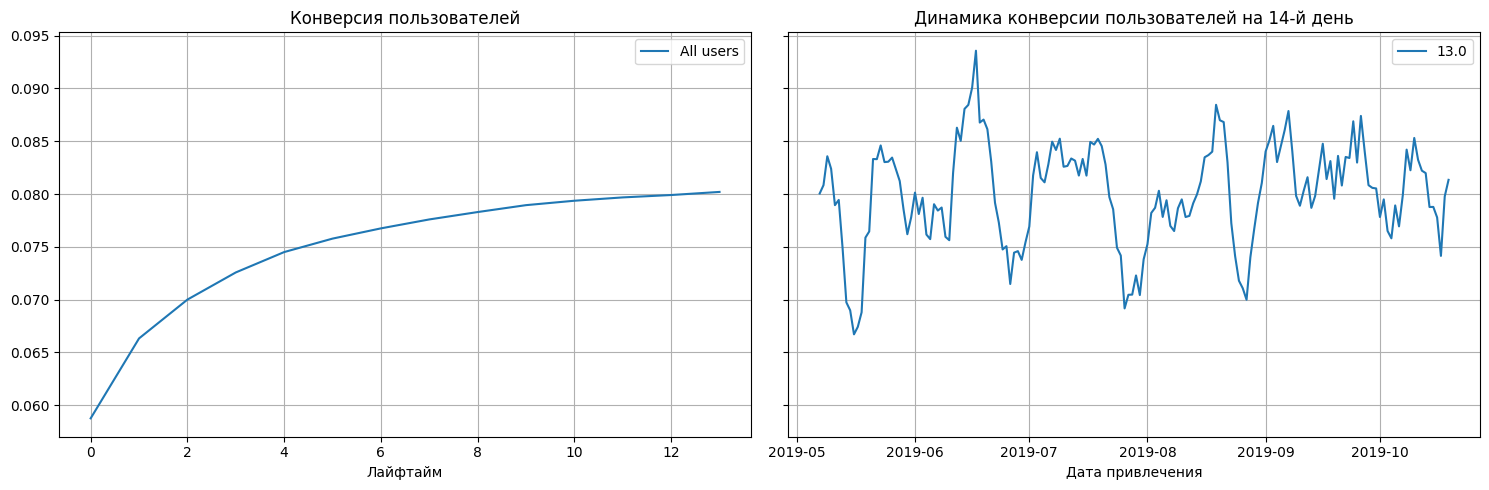

In [43]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, data_orders_info, observation_date, horizon_days)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Посмотрим на удержание пользователей.

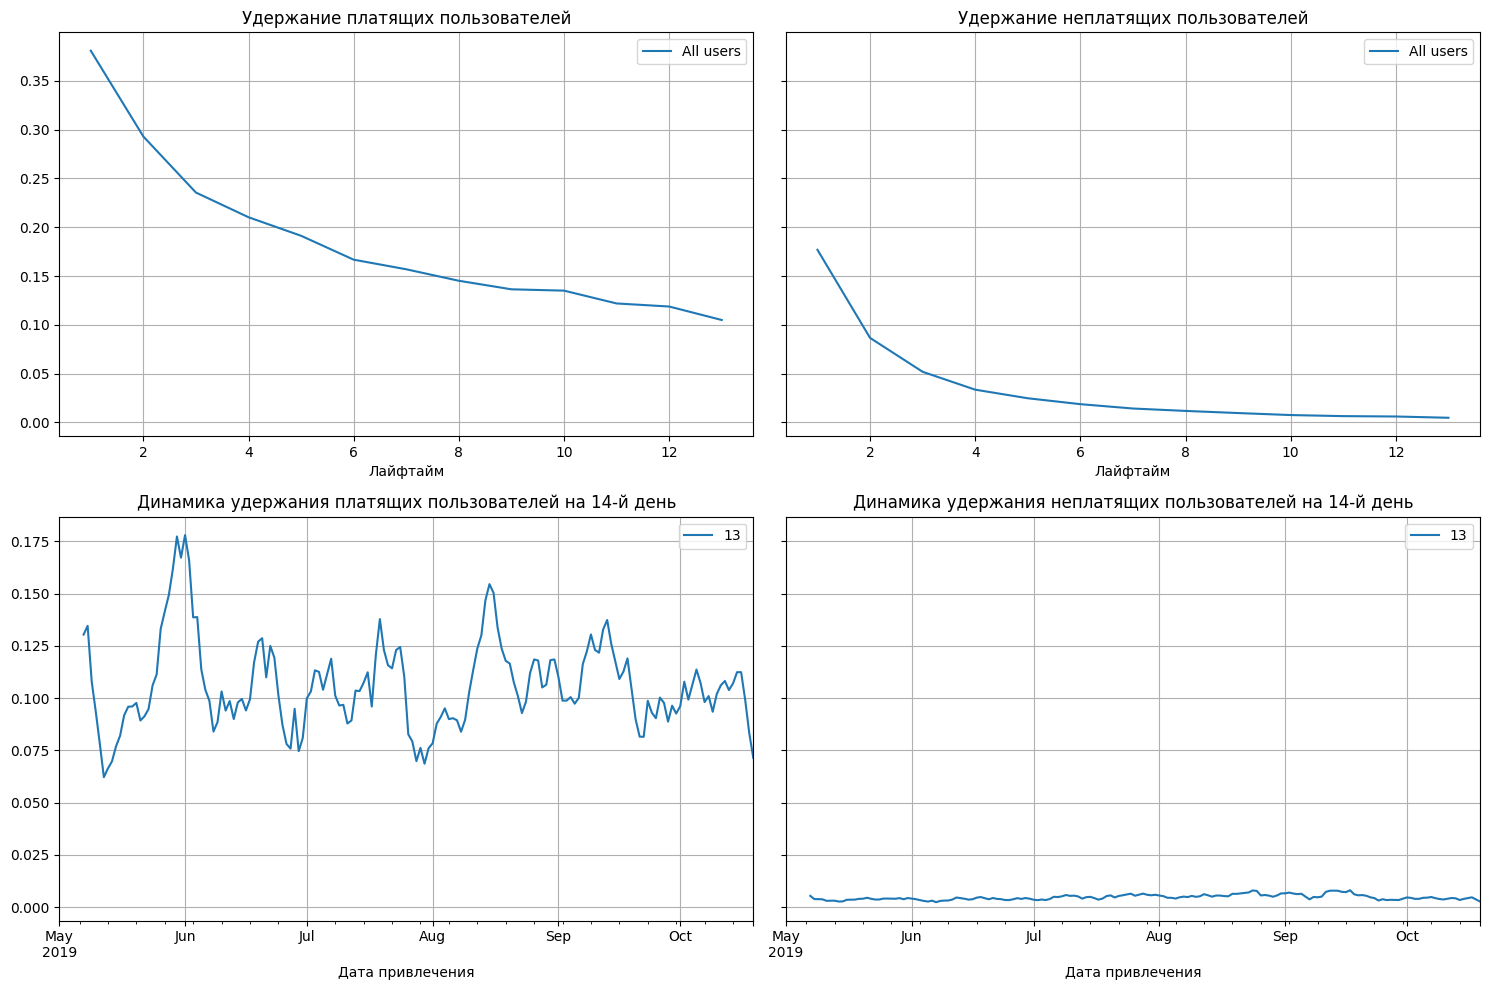

In [44]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, data_visits_info, observation_date, horizon_days)
plot_retention(retention_grouped, retention_history, horizon_days) 

Из предоставленных данных следует, что __конверсия пользователей есть__, однако важно обратить внимание на ее динамику. Конверсия пользователей, привлеченных в мае, существенно ниже, чем у пользователей, привлеченных в последующие периоды. Это может указывать на некоторые особенности, затрагивающие первоначальную стадию взаимодействия с продуктом.

Вероятно, пользователи, привлеченные в мае, сталкиваются с какими-то барьерами или неудовлетворенностью, что приводит к низкой конверсии. Эти барьеры могут быть связаны с несовершенствами в рекламной стратегии, недостаточной информацией о продукте или сложностью начального взаимодействия с ним.

Платящие пользователи хорошо удерживаются, неплатящие же наоборот, динамика удержания для них низкая. Платящие пользователи, вероятно, получают более качественный опыт использования продукта, что способствует их удержанию.

<a id="num93"></a>
### Окупаемость рекламы: по устройствам

Проанализируем окупаемость рекламы в разрезе устройств пользователей. 

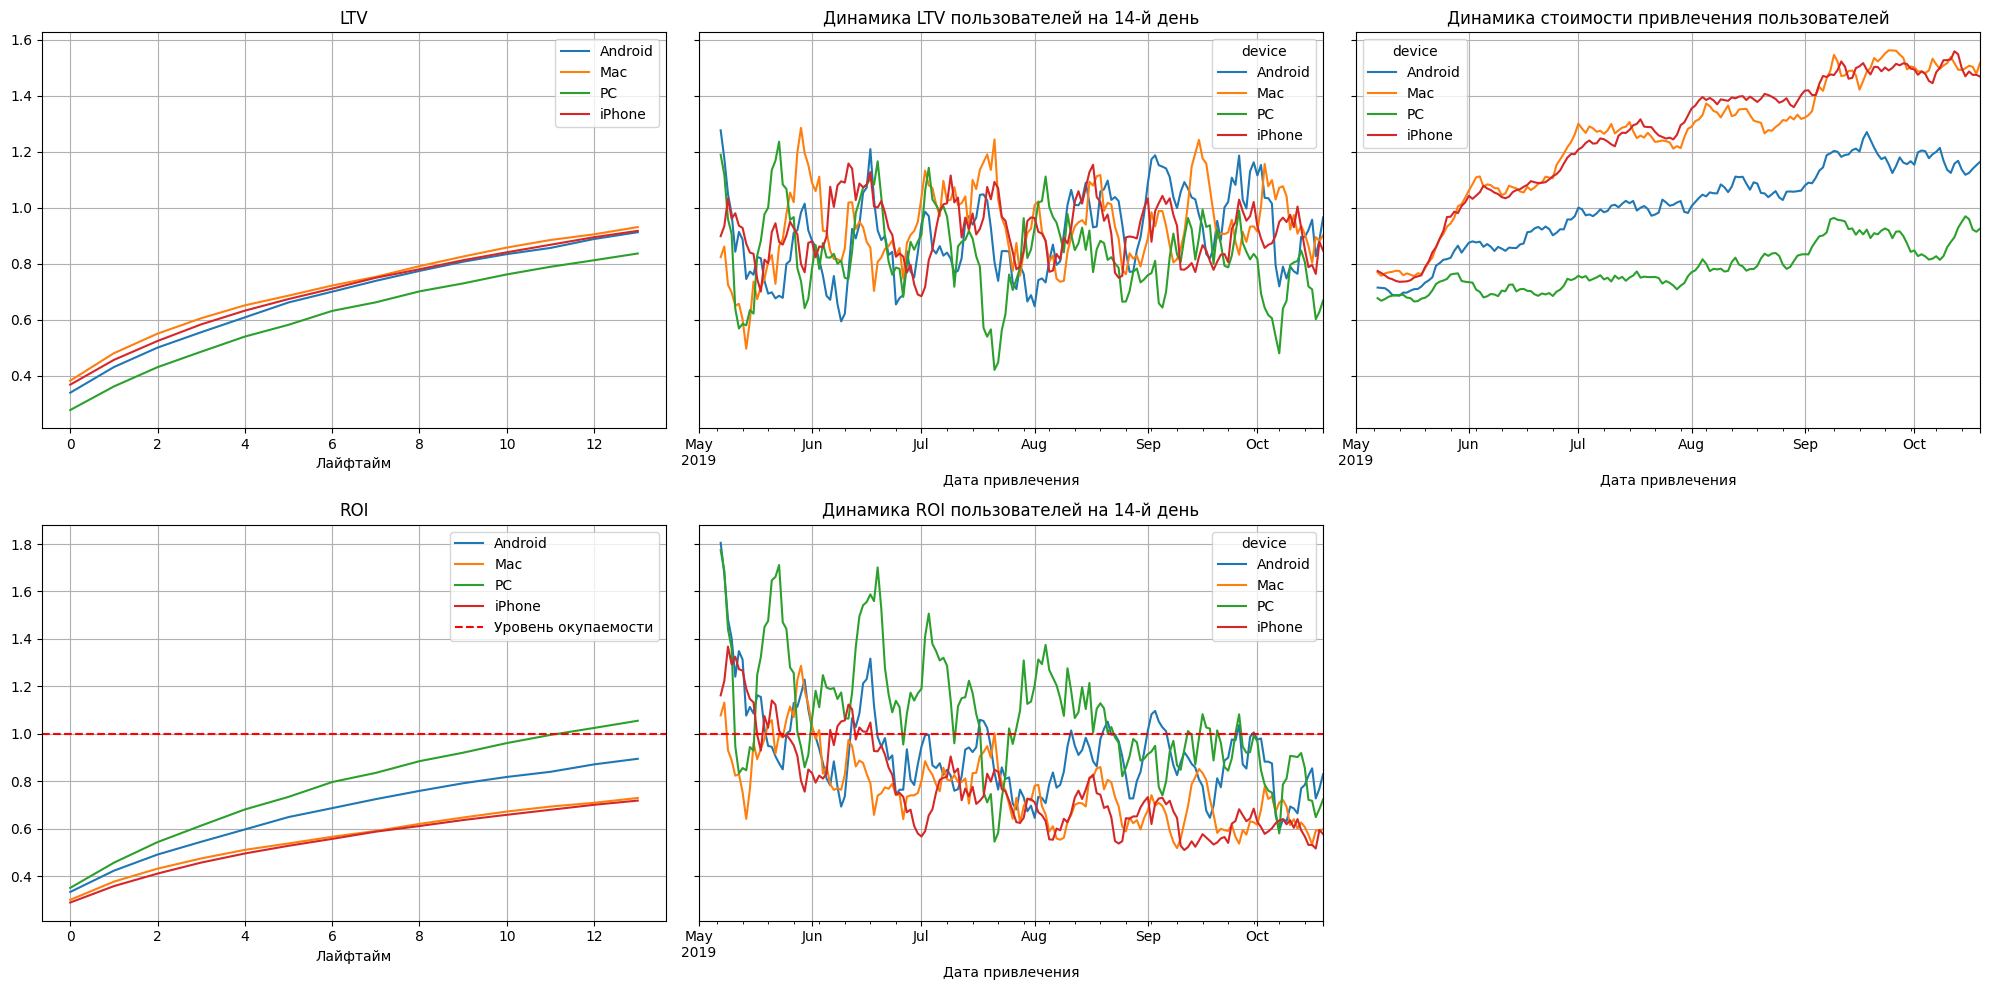

In [45]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, data_orders_info, observation_date, horizon_days, dimensions=['device'])
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7) 

Пользователи активно привлекаются, но это практически не окупается. 

С мая по июнь привлечение пользователей окупалось, но начиная с июня только пользователи, которые пользовались услугами через ``PC`` __частично__ окупались. Начиная __с августа__ никакие пользователи __уже не окупались__. 

<a id="num94"></a>
### Окупаемость рекламы: по странам


Проанализируем окупаемость рекламы в разрезе стран пользователей.

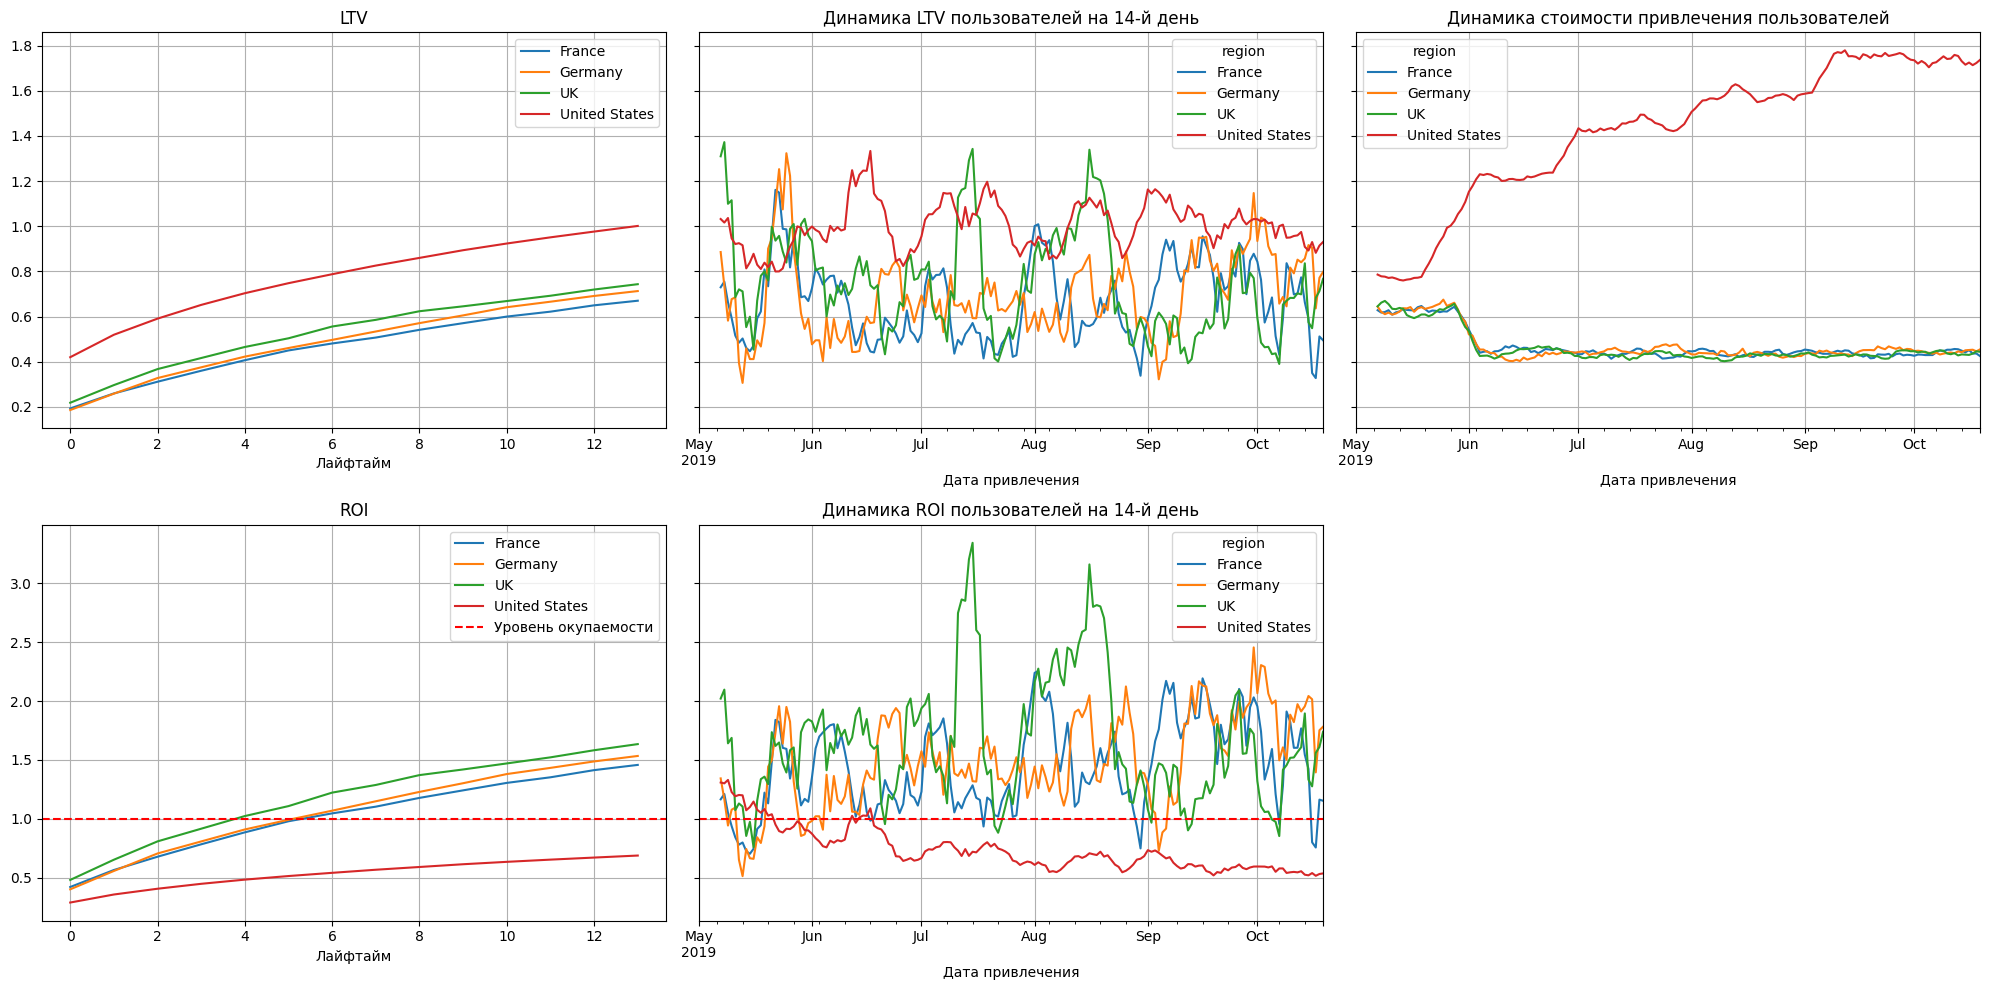

In [46]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, data_orders_info, observation_date, horizon_days, dimensions=['region'])
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7) 

С начала июня пользователи из ``США`` __перестали окупаться__. Учитывая, что стоимость их привлечения значительно выше по сравнению с другими странами, это не ожидаемое поведение. Вероятно, здесь играют роль какие-то специфические факторы, влияющие на поведение американских пользователей после привлечения.

``Франция``, ``Германия``, ``Великобритания``: пользователи из этих стран __преимущественно окупаются__. Это может говорить о более успешной адаптации пользователей из этих стран к продукту, более высокой ценности, которую они видят в продукте, или о других факторах, способствующих их активности и удержанию.

<a id="num95"></a>
### Окупаемость рекламы: по каналам привлечения

Проанализируем окупаемость рекламы в разрезе каналов привлечения пользователей. 

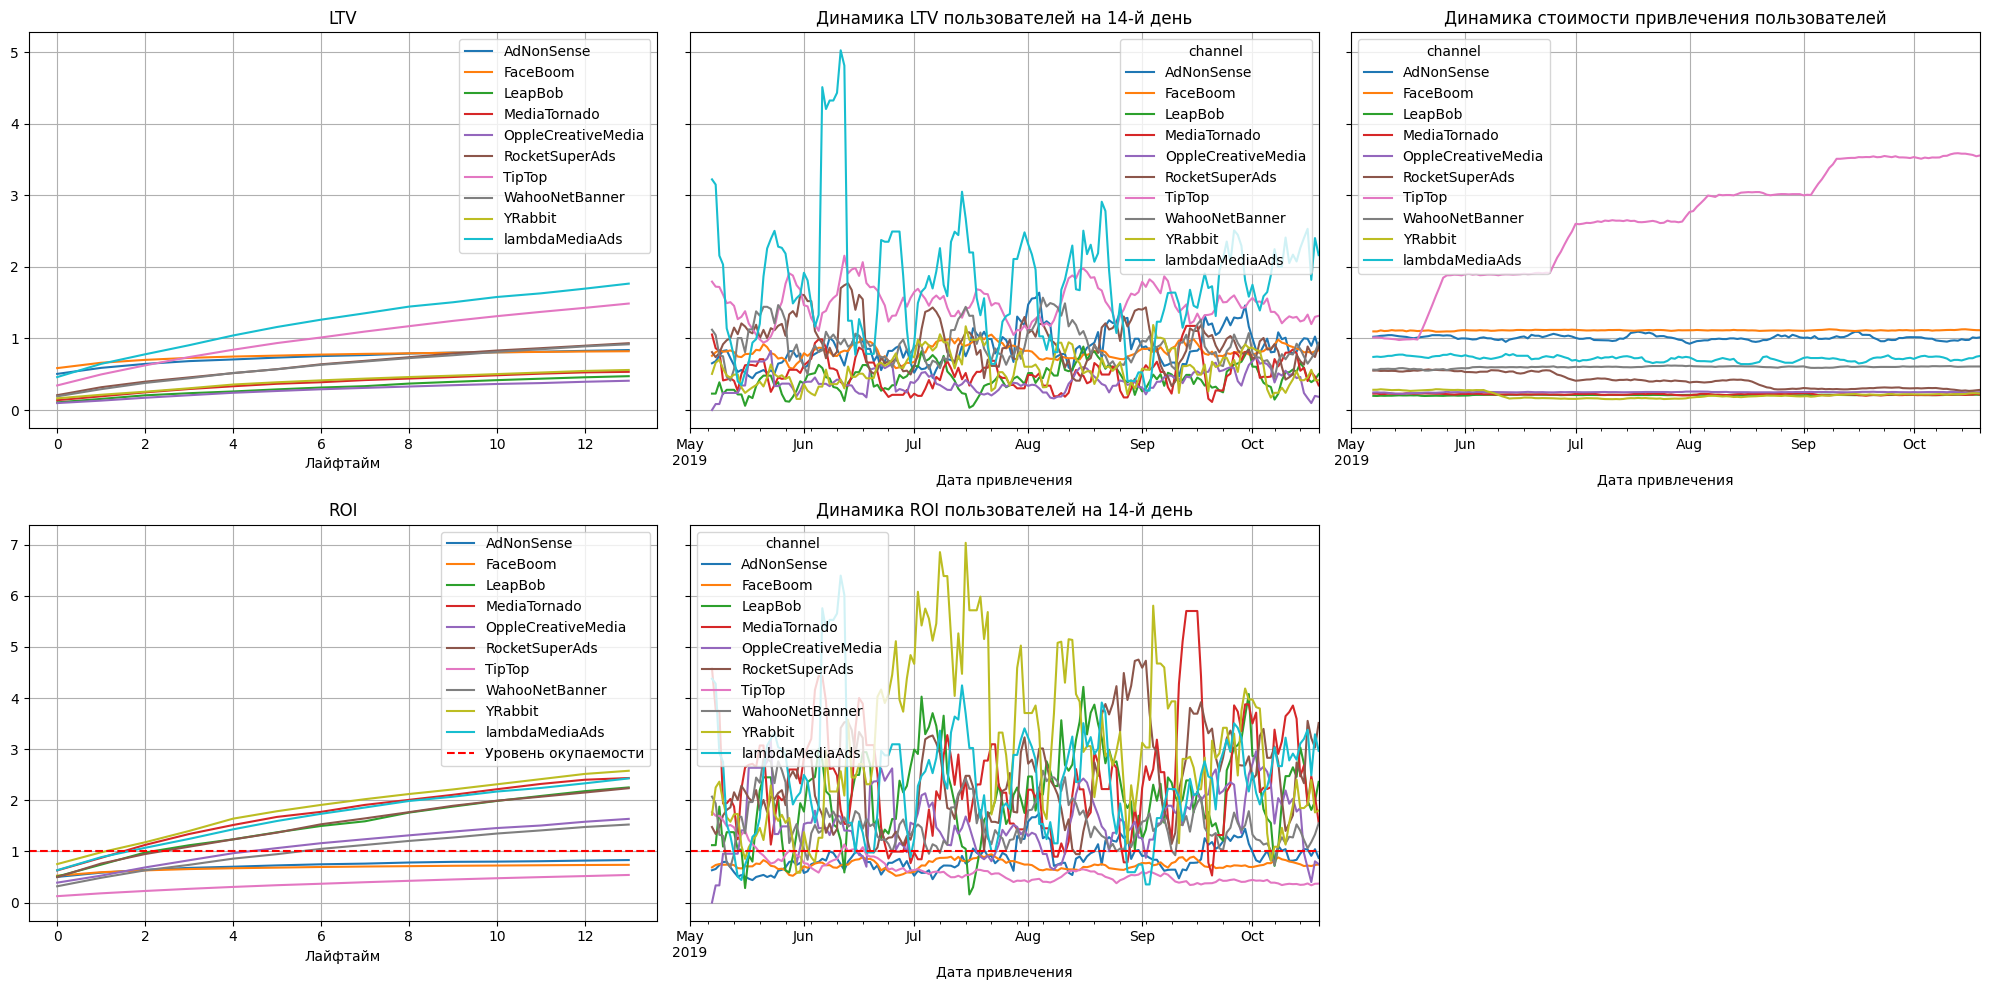

In [47]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, data_orders_info, observation_date, horizon_days, dimensions=['channel'])
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7) 

__Большая часть__ каналов привлечения __окупается__, но это каналы на которые была потрачена малая часть средств. 

Каналы же ``TipTop`` и ``FaceBoom``, на которые было потрачено ``82.7%`` от всех средств стабильно не окупаются. 

<a id="num96"></a>
### Конверсия: по устройствам

Посмотрим конверсию пользователей в зависимости от устройства. 

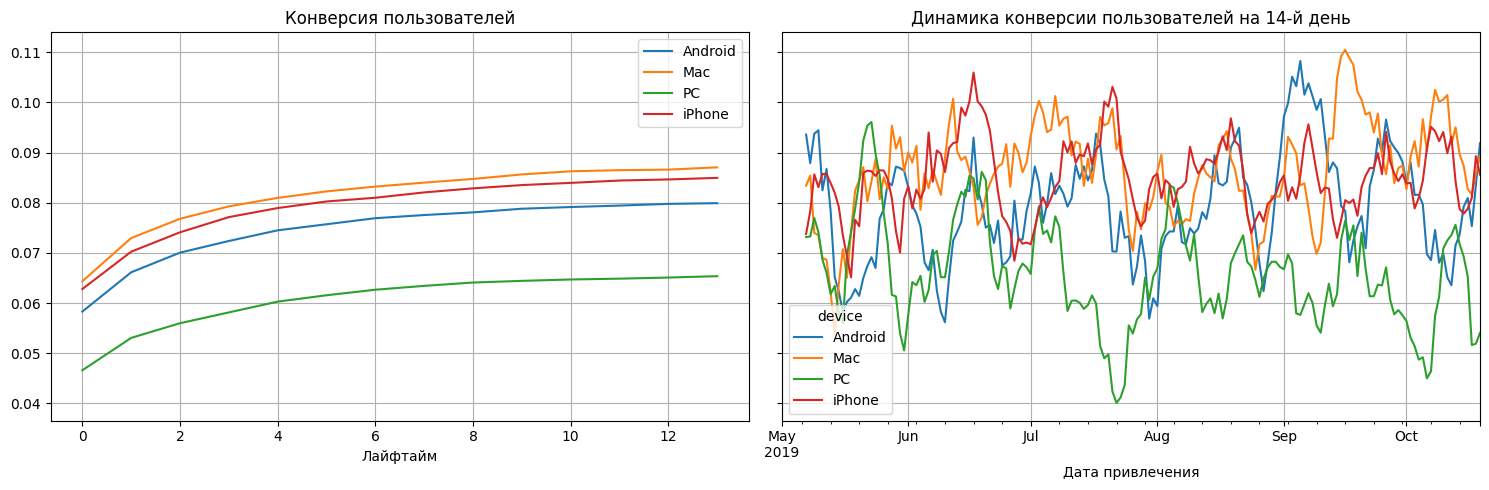

In [48]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, data_orders_info, observation_date, horizon_days, dimensions=['device'])
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=7) 

__Лучше всего__ конвертируются пользователи с ``Mac`` и ``iPhone``, пользователи, которые используют ``PC`` конвертируются __хуже всего__. 

<a id="num97"></a>
### Конверсия: по странам

Посмотрим конверсию пользователей в зависимости от страны.

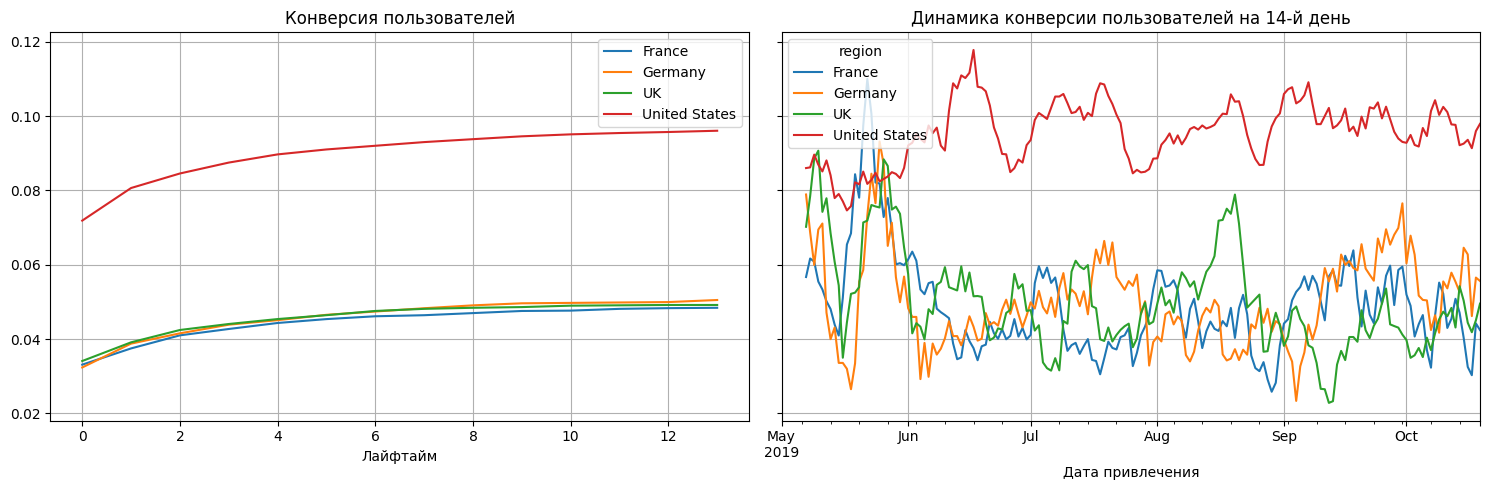

In [49]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, data_orders_info, observation_date, horizon_days, dimensions=['region'])
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=7) 

У ``США`` конверсия пользователей __самая высокая__. За первый месяц была замечена высокая конверсия у всех стран, но в последующие периоды она значительно снизилась и держалась примерно на одном уровне. 

<a id="num98"></a>
### Конверсия: по каналам привлечения

Посмотрим конверсию пользователей в зависимости от рекламного источника. 

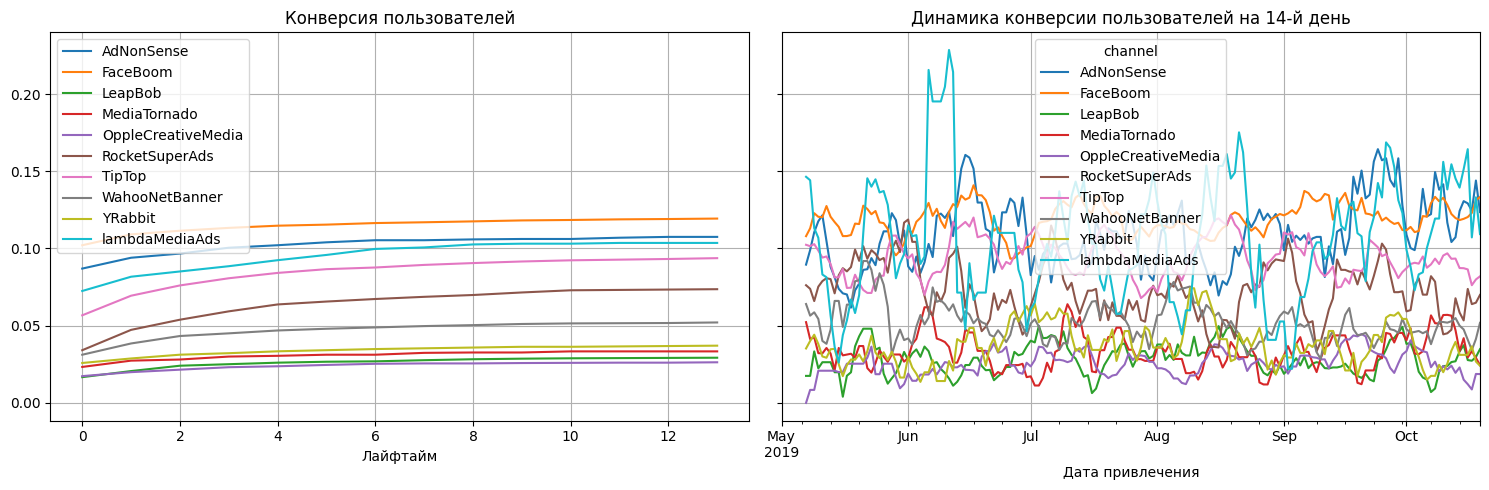

In [50]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, data_orders_info, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=7) 

Два канала привлечения, на которые была потрачена большая часть средств ``FaceBoom`` и ``TipTop``. Первый показывал стабильно высокую конверсию пользователей, со второго источника тоже есть конверсия пользователей, но не такая большая. 

Каналы ``lambdaMediaAds`` ``AdNonSense``, на которые было затрачено меньше средств показывают конверсию лучше чем ``TipTop``.

<a id="num99"></a>
### Окупаемость рекламы: итог

Ситуация с расходами и окупаемостью явно __требует внимания и корректировок__.

__Затраты на привлечение__ пользователей значительно __увеличились__ с мая и выше, однако они не приносят должной окупаемости. Это подтверждается показателем ROI, который остается ниже уровня окупаемости, указывая на то, что вложенные средства не приносят необходимой прибыли.

Несмотря на наличие конверсии пользователей, эффективность привлечения пользователей, особенно в мае, оставляет желать лучшего. Сравнение конверсии в последующие периоды говорит о том, что майские пользователи менее склонны к конверсии.

__Платящие пользователи__ демонстрируют __хороший уровень удержания__, однако динамика __удержания__ для __неплатящих пользователей__ __низкая__, что может говорить о недостаточной привлекательности сервиса для этой группы.

Привлечение пользователей остается активным, но ситуация с окупаемостью не улучшается. Начиная с июня окупаемость пользователей, особенно тех, кто пользуется услугами через мобильные устройства, становится крайне низкой и прекращает окупаться вовсе.

Интересно, что большая часть каналов привлечения __окупается__, но это в основном касается __каналов с небольшими затратами__. Однако два крупнейших канала, ``TipTop`` и ``FaceBoom``, на которые было потрачено значительное количество средств, __стабильно не окупаются__, что поднимает вопросы о целесообразности продолжения инвестирования в них.

Пользователи которые конвертируются, чаще всего используют ``Mac`` или ``iPhone``, находятся в ``США`` и привлечены через ``FaceBoom`` или ``lambdaMediaAds``, ``AdNonSense``. 

#### Окупается ли реклама, направленная на привлечение пользователей в целом?

Анализ показывает, что __большинство__ рекламных источников __не окупаются__ в полной мере. Основные бюджеты были направлены на два источника - ``TipTop`` и ``FaceBoom``, но результаты оказались недостаточно обнадеживающими. Отклик от этих источников хоть и был, но этого оказалось недостаточно и это отразилось на общей окупаемости.

С другой стороны, меньше внимания было уделено источникам, на которые выделялись небольшие средства. Однако даже при небольшом количестве привлеченных пользователей, эти источники показали стабильные результаты. Они либо окупили сами себя, либо достигли баланса между затратами и привлеченными пользователями.

#### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Из анализа данных можно выделить несколько факторов, которые могли оказывать негативное влияние на окупаемость рекламы:

Устройства:
Наблюдается, что пользователи с устройствами ``iPhone`` и ``Mac`` имеют __наименьший__ показатель окупаемости. Возможно, это связано с тем, что у этих пользователей могли возникать проблемы с совместимостью продукта на данных платформах, что в конечном итоге повлияло на их интерес к продукту.

Страны:
Несмотря на то, что большая часть платящих пользователей ``77.7%`` приходит из ``США``, __окупаемость там оказалась ниже__, чем в других странах. Возможно, начально большой интерес со стороны американских пользователей быстро угасал из-за некоторых факторов, что сказалось на общей окупаемости.

Рекламные каналы:
Два крупнейших канала - ``TipTop`` и ``FaceBoom`` - привлекли значительную часть бюджета, но окупаемость через них оказалась низкой и стабильно такой оставалась. 

#### Чем могут быть вызваны проблемы окупаемости?
Могу предположить, что подобные проблемы вызваны __неправильным распределением бюджета__, __ошибочным планом продвижения__. Не стоит исключать также то, что могла быть __неправильно подобранная__ и настроенная __реклама__.  

Отстутвие промежуточных анализов не могло бы исправить проблемы окупаемости, но могло бы уменьшить ущерб. 

<a id="num10"></a>
## Выводы

Для работы были получены следующие данные: 
- ``visits_info_short.csv`` — хранит лог сервера с информацией о посещениях сайта;
- ``orders_info_short.csv`` — хранит информацию о заказах;
- ``costs_info_short.csv`` — хранит информацию о расходах на рекламу.

Данные представлены в хорошем состоянии, нет пропусков, нет дублирований. Названия столбцов были приведены к единому виду, а у столбцов с датами тип данных был приведен к дате. 

О рекламе и окупаемости: 
1. ``США`` занимают лидирующее положение по доле пользователей среди всех привлеченных — ``6.9%``, что указывает на __значительный потенциал американского рынка__.

2. Платящие пользователи предпочитают использовать смартфоны ``iPhone`` — ``38.1%`` и компьютеры ``Mac`` — ``21.5%``,  также пользователи с устройствами ``Mac`` и ``iPhone`` проявляют более высокую склонность к покупкам, что возможно подразумевает специфическую аудиторию, которую сейчас привлекает реклама.

3. Каналы привлечения, такие как ``FaceBoom`` и ``TipTop``, играют важную роль в привлечении платящих пользователей, хотя и требуют значительных инвестиций, на  ``TipTop`` было выделено ``51.9%`` от всего бюджета, а на ``FaceBoom`` — ``30.8%``. Эффективность выбранных каналов имеет ключевое значение для общей окупаемости, так, если ``FaceBoom`` требует на привлечение пользователя ``1.1 условную единицу``, но доля платящих из этого источника — ``12.2%``. У ``TipTop`` стоимость привлечения — ``2.8 условные единицы``, а платящих — ``9.6%``. Стоит пересмотреть рекламную политику. 

4. Расходы на привлечение пользователей значительно возросли, однако ROI снижается, что указывает на проблемы с окупаемостью и необходимость пересмотра стратегии вложений.

5. Несмотря на некоторые успешные каналы привлечения, __общая окупаемость остается низкой__, особенно в последние месяцы. Это может требовать пересмотра бюджетных распределений и стратегии привлечения пользователей.

6. Динамика удержания платящих пользователей положительна, но неплатящие пользователи демонстрируют низкий уровень удержания, что может свидетельствовать о неудовлетворительной привлекательности сервиса для этой группы.

7. Наличие успешных каналов с низкими затратами и невысокой стоимостью привлечения — ``lambdaMediaAds``, ``AdNonSense``, подчеркивает важность выбора эффективных источников привлечения для обеспечения более высокой окупаемости.

Если рассматривать все затраты в целом, то нет, реклама никак не окупается. 
Если смотреть на рекламные каналы отдельно, то да, некоторые удачные решения были — ``lambdaMediaAds``, ``AdNonSense``, но, увы, они не были приоритетными и вложение средств в них не изменило ситуацию. 

Пользователи из Франции, пользователи, которые пользуются PC довольно плохо конвертируются, можно предположить, что они испытывают трудности с использованием продукта. 

Пользователи, которые привлечены не рекламой также плохо конвертируются. Можно предположить, что эта группа пользователей не получает от продукта желаемого. 

<a id="num11"></a>
## Рекомендации

После проведенного анализа могу предложить следующие рекомендации. 

1. __Пересмотр стратегии и бюджета__:

Следует пересмотреть эффективность каждого рекламного канала и источника. По имеющимся результатам стоит __снизить бюджет__ на ``TipTop`` и рассмотреть другие __каналы__, в которые с мая по октябрь __мало инвестировали__, но они стабильно показывали приемлемый уровень окупаемости. 

2. __Улучшение конверсии__:

Стоит обратить внимание на моменты с наибольшим оттоком клиентов, как платящих, так и нет. Провести анализ причин и доработать стратегию, которая исключила бы подобные ситуации в будущем. 

3. __Фокус на качестве и целевой аудитории__:

Нужно более подробно изучить профили пользователей, __которые уже были привлечены и удержаны__, это поможет понять какую целевую аудиторию привлекла текущая рекламная стратегия, а затем расширить ее и на другие группы пользователей, как платящие, так и нет. 

4. __Анализ данных и оптимизация__:

Нужно __добавить непрерывный мониторинг и анализ данных__, чтобы быстро реагировать на изменения и оптимизировать кампании.

5. __Обратить внимание на органических клиентов__

Продукт привлекает очень много органических клиентов, их порядка 40% от всех, но платящих из них всего 2%. Стоит рассмотреть варианты привлечения этих пользователей в платящий сегмент. 

Помимо этого стоит пересмотреть не только рекламную стратегию, каналы привлечения, пользователей и другие моменты, но и обратить внимание на команду и планирование бюджета. 